<a href="https://colab.research.google.com/github/Khushbu1985/GenerativeAI/blob/main/Embeddings_Sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
ta_reviews_df = pd.read_csv('https://raw.githubusercontent.com/Khushbu1985/GenerativeAI/main/tripadvisor_hotel_reviews.csv')

In [3]:
pd.set_option('display.max_colwidth',500)
ta_reviews_df.head(10)

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer,...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred gue...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathro...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer...",5
5,"love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husband celebrating 12th wedding anniversary, talk mixed emotions, booked suite hotel monte carlos, loaned beautiful fan-tanned goldfish named joliet weekend visited dogs worked desk human companions, room decorated nicely couch used pillows, l'occitane bath amenities welcome sight, room quiet peaceful, wireless internet access wonderful server went morning leaving problems printing boarding passes, a...",5
6,"cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance come ride.we booked monte carlo suite proved comfortable longish stay, room 905 located street building, street noise not problem view interesting rooms building look dank alley midsection large office building, suite comfortable plenty room spread, bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas, lots comfortable seating options good lighting plenty sto...",5
7,"excellent staff, housekeeping quality hotel chocked staff make feel home, experienced exceptional service desk staff concierge door men maid service needs work, maid failed tuck sheets foot bed instance soiled sheets used, staff quickley resolved soiled sheets issue, guess relates employee not reflection rest staff.we received excellent advice concierge regarding resturants area happy hour wine tasting nice touch staff went way make fee

In [4]:
ta_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
ta_df = pd.DataFrame(ta_reviews_df)
print(ta_df)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Review  \
0      nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage st

In [6]:
ta_df['rating_new'] = np.where(ta_df['Rating']
                       <3, 1,0 )
b= ta_df['rating_new'].count()
a= sum(ta_df['rating_new'])/b

print(a)

0.15684934849446097


Data tokenization using Tensor Flow and keras

```
# This is formatted as code
```



In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [8]:
all_tokenizer = Tokenizer()

In [9]:
all_tokenizer.fit_on_texts( ta_df.Review )

In [10]:
all_tokenizer.document_count

20491

In [11]:
len(all_tokenizer.word_counts)

52211

In [12]:
all_tokenizer.word_index['the']

28

In [13]:
all_tokenizer.texts_to_sequences( ["ITC Grand hotel is a fantastic place to spend you vacation in Goa"])

[[12089, 460, 1, 4392, 326, 96, 26, 1163, 379, 652, 125, 167]]

In [14]:
max_num_tokens=10000

In [15]:
max_review_length = 500

In [16]:
from keras.layers import TextVectorization

In [17]:
vectorize_layer = TextVectorization(max_tokens = max_num_tokens,
                                    output_mode='int',
                                    output_sequence_length = max_review_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace')

In [18]:
text_dataset = tf.data.Dataset.from_tensor_slices(list(ta_df.Review))

In [19]:
vectorize_layer.adapt(text_dataset.batch(64))

In [20]:
vectorize_layer.get_vocabulary()[0:10]

['', '[UNK]', 'hotel', 'room', 'not', 'great', 'nt', 'good', 'staff', 'stay']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(ta_df.Review,
                                                    ta_df.rating_new,
                                                    test_size = 0.2)

In [24]:
# X_train.shape
X_test.shape

(4099,)

In [26]:
input_shape = X_train.shape
input_shape

(16392,)

In [27]:
from keras import Sequential
from keras.layers import Embedding, Flatten, Activation, Dense
from keras.optimizers import SGD

In [28]:
keras.backend.clear_session()  # clear default graph

emb_model = Sequential()
emb_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
emb_model.add(vectorize_layer)
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model.add(Embedding(max_num_tokens, 8, input_length=max_review_length, name='layer_embedding'))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model.add(Flatten())

emb_model.add(Dense(16))
emb_model.add(Activation('relu'))

# We add the classifier on top
emb_model.add(Dense(1))
emb_model.add(Activation('sigmoid'))

In [29]:
emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 500)               0         
 ctorization)                                                    
                                                                 
 layer_embedding (Embedding  (None, 500, 8)            80000     
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 16)                64016     
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [30]:
sgd = SGD(learning_rate=0.01, momentum=0.8)

In [31]:
emb_model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
emb_history = emb_model.fit(X_train,
                            y_train,
                            epochs=10,
                            batch_size=32,
                            validation_split=0.3)

Epoch 1/10
359/359 [==============================] - 5s 10ms/step - loss: 0.4427 - accuracy: 0.8413 - val_loss: 0.4420 - val_accuracy: 0.8402
Epoch 2/10
359/359 [==============================] - 3s 8ms/step - loss: 0.4338 - accuracy: 0.8423 - val_loss: 0.4382 - val_accuracy: 0.8402
Epoch 3/10
359/359 [==============================] - 3s 8ms/step - loss: 0.4321 - accuracy: 0.8423 - val_loss: 0.4332 - val_accuracy: 0.8402
Epoch 4/10
359/359 [==============================] - 3s 7ms/step - loss: 0.4288 - accuracy: 0.8423 - val_loss: 0.4315 - val_accuracy: 0.8402
Epoch 5/10
359/359 [==============================] - 5s 13ms/step - loss: 0.4209 - accuracy: 0.8423 - val_loss: 0.4154 - val_accuracy: 0.8402
Epoch 6/10
359/359 [==============================] - 3s 7ms/step - loss: 0.3858 - accuracy: 0.8423 - val_loss: 0.3569 - val_accuracy: 0.8402
Epoch 7/10
359/359 [==============================] - 3s 8ms/step - loss: 0.3106 - accuracy: 0.8565 - val_loss: 0.2899 - val_accuracy: 0.8688
Epoc

In [33]:
def plot_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

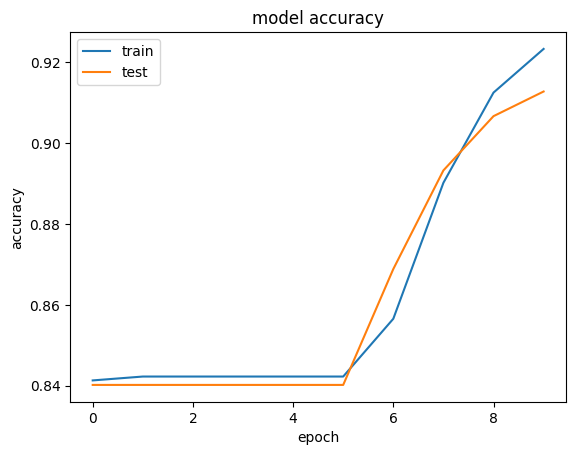

In [34]:
plot_accuracy( emb_history.history )

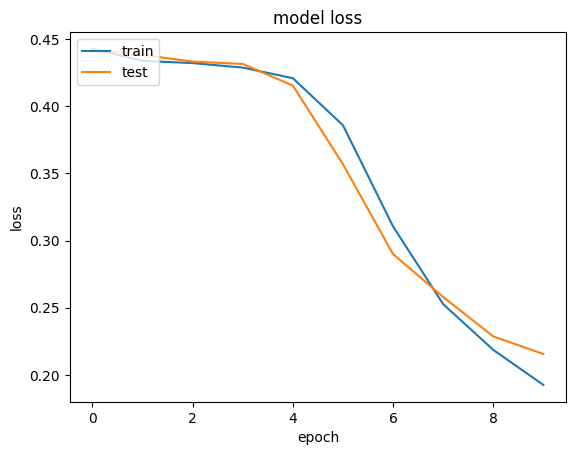

In [35]:
plot_loss( emb_history.history )

In [36]:
layer_embedding = emb_model.get_layer('layer_embedding')

In [37]:
weights_embedding = layer_embedding.get_weights()[0]

In [38]:
weights_embedding.shape

(10000, 8)

In [39]:
vocab_list = vectorize_layer.get_vocabulary()

In [40]:
vocab_list.index('good')

7